### KNN : K-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/Sreemanto/DSP-55/main/sonar_signal.csv')

In [17]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [19]:
df['f60'] = pd.get_dummies(df['f60'])

In [7]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [20]:
df.f60.value_counts()

1    111
0     97
Name: f60, dtype: int64

### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
x = df.drop(['f60'], axis = 1)
y = df.f60

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

In [46]:
KNN_1 = KNeighborsClassifier(n_neighbors = 1)
KNN_1.fit(x_train, y_train)

Actual = y_test
Predicted = KNN_1.predict(x_test)

In [47]:
print('Accuracy for K=1 :', metrics.accuracy_score(Actual, Predicted) )

Accuracy for K=1 : 0.8269230769230769


In [48]:
KNN_3 = KNeighborsClassifier(n_neighbors = 3)
KNN_3.fit(x_train, y_train)

Predicted = KNN_3.predict(x_test)
print('Accuracy for K=3 :', metrics.accuracy_score(Actual, Predicted))

Accuracy for K=3 : 0.8269230769230769


In [49]:
KNN_5 = KNeighborsClassifier(n_neighbors = 5)
KNN_5.fit(x_train, y_train)

Predicted = KNN_5.predict(x_test)
print('Accuracy for K=5 :', metrics.accuracy_score(Actual, Predicted))

Accuracy for K=5 : 0.7692307692307693


### K-Fold Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

In [52]:
KNN_1 = KNeighborsClassifier(n_neighbors = 1)

Accuracy = cross_val_score(KNN_1, x, y, cv = 10, scoring = 'accuracy')  #cv = cross validation. generally between(5-10)
Accuracy

array([0.52380952, 0.80952381, 0.85714286, 0.42857143, 0.47619048,
       0.52380952, 0.52380952, 0.71428571, 0.45      , 0.75      ])

In [53]:
Accuracy.mean()*100

60.57142857142858

In [54]:
KNN_5 = KNeighborsClassifier(n_neighbors = 5)
Accuracy = cross_val_score(KNN_5, x, y, cv = 10, scoring = 'accuracy')
Accuracy.mean()*100

59.523809523809526

In [59]:
#we can run a loop for different no of k values and finding best k-value

Range = list(range(1,30))
l1 = []

for i in range(1,30):
    KNN = KNeighborsClassifier(n_neighbors = i)
    Accuracy = cross_val_score(KNN, x , y, cv=10, scoring = 'accuracy').mean()*100
    
    l1.append(Accuracy)
l1

[60.57142857142858,
 58.07142857142856,
 59.523809523809526,
 60.5,
 59.523809523809526,
 56.61904761904761,
 57.57142857142858,
 56.09523809523809,
 55.547619047619044,
 57.452380952380956,
 56.02380952380952,
 57.92857142857144,
 60.92857142857142,
 58.95238095238094,
 60.45238095238095,
 57.571428571428584,
 62.45238095238095,
 58.07142857142858,
 60.476190476190474,
 56.64285714285714,
 60.02380952380953,
 58.09523809523809,
 58.07142857142858,
 58.07142857142858,
 59.54761904761905,
 59.07142857142858,
 59.07142857142858,
 56.61904761904763,
 58.07142857142858]

In [60]:
import matplotlib.pyplot as plt

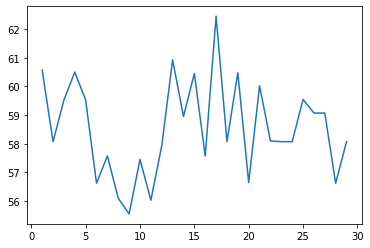

In [63]:
plt.plot(Range, l1)

In [62]:
#the ideal value of k must be around 17 as its accuracy is highest

In [71]:
knn = KNeighborsClassifier(n_neighbors = 17)
acc = cross_val_score(knn,x, y, cv = 10, scoring='accuracy' )
acc.mean()

0.6245238095238095